# Exercícios de fixação
## Operações básicas e vetoriais

### Cálculo de desvio padrão

Desvio padrão é uma medida estatística de dispersão, usada para avaliar quão "separado" os dados estão, em relação a uma medida de centralidade (geralmente, a média). Vamos representá-la pelo símbolo $\sigma$.

O desvio padrão de uma população é dada por $\sigma = \sqrt{\dfrac{\sum(x_i - \bar{x})^2}{N}}$, onde $x_i$ é cada elemento da população, $\bar{x}$ é a média da população, e $N$ o total de elementos. (Nota: no caso do desvio padrão de uma amostra, é utilizado $N - 1$ no denominador).

Outra definição equivalente do desvio padrão é $\sigma = \sqrt{E[X^2] - (E[X]^2)}$, onde $X$ são os dados, e $E$ representa a esperança, ou média, de um conjunto de dados.

**Exercício 1**: Escreva uma função que calcule o desvio padrão de um vetor unidimensional. Não vale usar a função pronta `np.std` para escrever sua função, mas use ela para verificar seu resultado.
 
**Extra 1**: Faça outra função pro desvio padrão, mas usando a outra definição. Verifique que os resultados são iguais.

Dicas:

- Lembre-se de usar o `return` para retornar o resultado da sua função
- A função `len` funciona para vetores assim como para listas
- A função `np.sqrt` tira a raíz quadrada de um vetor (ou equivalentemente, utilize a exponenciação por meio, `x ** 0.5`)
- Utilize `np.sum` para reduzir um vetor à sua soma e `np.mean` para reduzir à sua média
- Cuidado ao utilizar o símbolo `==` para comparar sua resposta. Podem haver erros numéricos que causam a resposta a ser 1.9999999 em vez de 2; verifique os resultados manualmente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.array([2, 4, 4, 4, 5, 5, 7, 9])
np.std(a)

Desvio padrao numpy: 2.0
Desvio padrao 1: 2.0
Desvio padrao 2: 2.0


## Visualizando a distribuição normal

A distribuição normal é uma das distribuições estatísticas mais utilizadas. Sua forma é chamada de "sino". Podemos definir sua função de densidade de probabilidade como $f(x | \mu, \sigma^2) = \dfrac{e^{-\dfrac{(x - \mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}$, onde $\mu$ é a média da distribuição e $\sigma$ é o desvio padrão ($\sigma^2$ é chamado de variância).

**Exercício 2**: Construa o gráfico da distribuição normal com média 0 e desvio padrão 1, com x variando de -5 a 5. O gráfico deve conter pelo menos 100 amostras de x.

Dicas:

- $e^x$ é representado em numpy como `np.exp(x)`
- Como vimos anteriormente, $\pi$ é acessado pela constante `np.pi`
- Para gerar a amostragem de x, utilize a função `np.linspace`, como fizemos no gráfico do seno
- Como sabemos de antemão os valores de $\mu$ e $\sigma$, você pode facilitar seu código simplificando a função manualmente

**Extra 2**: Coloque no mesmo gráfico (mas em outras cores) o gráfico da distribuição normal com os seguintes parâmetros: $\mu=0, \sigma=5$, $\mu=0, \sigma=0.2$, e $\mu=5, \sigma=1$, juntamente com o gráfico anterior; para todos, o valor de x deve variar de -10 a 10 (aumente a amostragem para 500 pontos).

## Aproximando o valor de $\pi$ através de simulação

Um modo de gerar valores aproximados para $\pi$ é utilizando o método de simulação de Monte Carlo. A ideia do método é o seguinte:

- Crie um quadrado com lado 1 (e portanto área 1), centrado na origem
- Crie uma circunferência inscrita nesse quadrado (e portanto com raio 0.5 e área $0.25\pi$). A equação dessa circunferência é $x^2 + y^2 = r^2 = 0.25$
- Podemos verificar se um ponto está dentro da circunferência utilizando a inequação $x^2 + y^2 \leq 0.25$
- Se gerarmos N pontos aleatórios uniformemente distribuídos nesse quadrado, é esperado que $0.25\pi N$ estejam dentro do círculo
- Assim, se contarmos a proporção de pontos dentro do círculo para o total de pontos, esse número se aproxima de $0.25 \pi$, e se multiplicarmos essa proporção por 4, teremos uma aproximação de $\pi$.

A figura abaixo mostra como é este círculo inscrito.

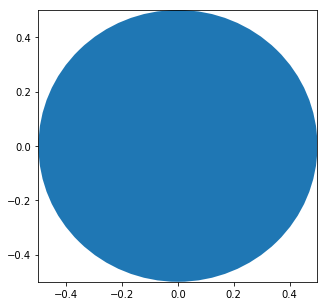

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches((5, 5))
circ = plt.Circle((0, 0), 0.5)
ax.add_artist(circ)
ax.set_xlim((-0.5, 0.5))
ax.set_ylim((-0.5, 0.5))

plt.show();

**Exercício 3**: aproxime $\pi$ utilizando o método de Monte Carlo, com $N=500$.

Dica:

- Uma matriz uniformemente com valores uniformementre distribuídos entre 0 e 1, com i linhas e j colunas, é gerado pela função `np.random.rand(i, j)`
- Quando uma matriz é utilizada como iterador do comando `for`, itera-se as linhas da matriz

**Extra 3**: resolva o exercício 3 utilizando somente operações vetoriais, sem utilizar o comando `for`.

Dica:
- Utilize máscaras booleanas
- A função `np.sum` em um vetor de booleanos retorna a contagem de verdadeiros.

In [3]:
# Exercício 1
# Definindo a função de desvio padrão conforme a primeira fórmula dada
def desviopadrao1(array_pontos):
	desv = 0
	med = np.mean(array_pontos)
	for ponto in array_pontos:
		aux = ponto - med
		aux = np.power(aux,2)
		desv += aux
	desv = desv/len(array_pontos)
	desv = np.power(desv,0.5)
	return desv

# Extra 1
# Definindo a função de desvio padrão conforme a segundas fórmula dada
def desviopadrao2(array_pontos):
	med1 = np.power(np.mean(array_pontos),2)
	med2 = np.mean(np.power(array_pontos,2))
	desv = med2 - med1
	desv = np.power(desv,0.5)
	return desv

# Definindo o array para o desvio padrão
a = np.array([2, 4, 4, 4, 5, 5, 7, 9])
# Prints para verificar o valor do desvio padrão
print("Desvio do numpy: "+ str(np.std(a)))  # Desvio padrão utilizando a biblioteca numpy
print("Desvio padrao 1: "+ str(desviopadrao1(a)))  # Desvio padrão utilizando a primeira fórmula
print("Desvio padrao 2: "+ str(desviopadrao2(a)))  # Desvio padrão utilizando a segunda fórmula

Desvio do numpy: 2.0
Desvio padrao 1: 2.0
Desvio padrao 2: 2.0


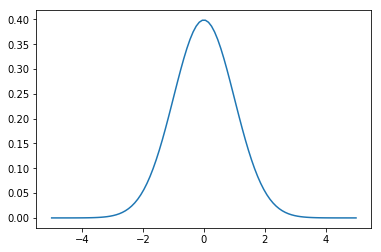

In [9]:
# Exercicio 2

# Definindo a função para o calculo da densidade de probabilidade, recebendo valores do tipo float64 para x, u e v
def densidadedeprobabilidade(x, u, v):
    return np.exp(-(np.power((xis-u),2))/2*np.power(v,2))/np.sqrt(2*np.pi*np.power(v,2))

# Criando o vetor x de tamanho 100 com dados float64, no intervalo de -5,5
x = np.linspace(-5,5,100)

# Criando o vetor y de tamanho 100, com valores 0, para posteriormente armazenar os valores de densidade de probabi-
#lidade
y = np.zeros(100)

# Utilizando a função enumerate para cacular a densidade de probabilidade para cada valor de x, e utilizando o índice
#para armazenar os valores no vetor y
for i, xis in enumerate(x):
    # Armazenando em cada posição de y de índice i, os valores calculados pela função de densidade de probabilidade
    y[i] = densidadedeprobabilidade(xis, 0, 1)

# Plotando o gráfico obtido, sendo o eixo x o intervalor [-5,5] e y os valores obtidos pela função de densidade de 
#probabilidade
plt.plot(x, y)

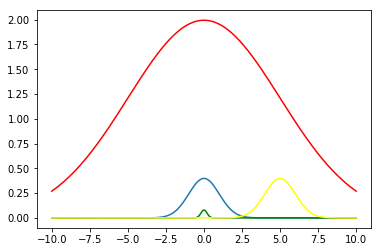

In [12]:
# Extra 2 versão 1

# Criando um vetor com tamanho de 500, tendo valores do tipo float64, no intervalo de [-10,10]
x = np.linspace(-10,10,500)

# Criando vetores de zeros com tamanho de 500, para posteriormente receber os valores 
y = np.zeros(500)
y1 = np.zeros(500)
y2 = np.zeros(500)
y3 = np.zeros(500)

for i, xis in enumerate(x):
    # Armazenando nos vetores anteriormente criados, os valores obtidos pela função de densiade de probabilidade
	y[i] = densidadedeprobabilidade(xis, 0, 1)
	y1[i] = densidadedeprobabilidade(xis, 0, 5)
	y2[i] = densidadedeprobabilidade(xis, 0, 0.2)
	y3[i] = densidadedeprobabilidade(xis, 5, 1)

# Plotando os gráficos
plt.plot(x, y)
plt.plot(x, y1, 'green')
plt.plot(x, y2, 'red')
plt.plot(x, y3, 'yellow')

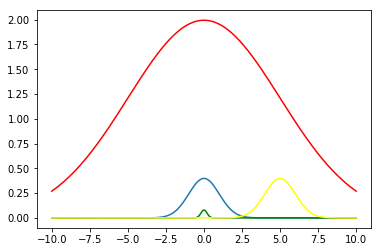

In [6]:
# Extra 2 versão 2

# Redefinindo a função de densidadade de probabilidade retornar um vetor de float64, ao invés de apenas um valor
#float64, feito no exercício anterior
def densidadedeprobabilidade(x, u, v):
	aux = np.zeros(len(x))
	for i, ex in enumerate(x):
		aux[i] = np.exp(-(np.power((ex-u),2))/2*np.power(v,2))/np.sqrt(2*np.pi*np.power(v,2))
	return aux

# Criando o vetor x, com o tamanho de 500 que contém valores no intervalo [-10,10]
x = np.linspace(-10,10,500)

# Criando vetores de zero, de tamanho 500, para posteriormente armazenar o valor das densidades de probabilidade
y = np.zeros(500)
y1 = np.zeros(500)
y2 = np.zeros(500)
y3 = np.zeros(500)

# Vetores recebendo os valores de densidade de probabilidade
y = densidadedeprobabilidade(x, 0, 1)
y1 = densidadedeprobabilidade(x, 0, 5)
y2 = densidadedeprobabilidade(x, 0, 0.2)
y3 = densidadedeprobabilidade(x, 5, 1)

# Plotando os gráficos
plt.plot(x, y)
plt.plot(x, y1, 'green')
plt.plot(x, y2, 'red')
plt.plot(x, y3, 'yellow')

In [ ]:
#Exercício 3
N = 500
div = N * 0.25
vetor_aleatorio = np.random.rand(N, 2)
vetor_aleatorio -= 0.5
contador = 0
for obj in vetor_aleatorio:
    if (((np.power(obj[0],2)) + (np.power(obj[1],2))) <= 0.25):
        contador += 1
aprox = contador/div
print(str(aprox))